In [ ]:
Create a file “people.txt” with the following data:
21 adult 6.0 single -1
2 child 3 married 0
18 adult 5.7 married 20
221 elderly 5 widowed 2
34 child -7 married 3

i) Read the data from the file “people.txt”.

ii) Create a ruleset E that contain rules to check for the following conditions:

1.The age should be in the range 0-150.
2.The age should be greater than yearsmarried.
3.The status should be married or single or widowed.
4.If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult,
  if age is more than 65 the agegroup should be elderly.

iii) Check whether ruleset E is violated by the data in the file people.txt.

iv) Summarize the results obtained in part (iii)

v) Visualize the results obtained in part (iii)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive/


In [ ]:
#i>
import pandas as pd

df = pd.read_table("people.txt", delim_whitespace=True, names=["Age","Age group","Height","Status","Years married"])
df

,Age,Age group,Height,Status,Years married
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [ ]:
#ii>
#1.
def AgeRange(df):
  result = (df['Age']>=0) & (df['Age']<=150)
  return result

AgeRange(df)

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool

In [ ]:
#2.
def AgeYearsMarried(df):
  result = df['Age'] > df['Years married']
  return result

AgeYearsMarried(df)

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [ ]:
#3.
def Status(df):
  result = df['Status'].isin(['single','married','widowed'])
  return result

Status(df)

0    True
1    True
2    True
3    True
4    True
Name: Status, dtype: bool

In [ ]:
#4.
def AgeGroup(df):
  result = ((df["Age group"]=="child") & (df["Age"]<18)) | ((df["Age group"]=="adult") & (df["Age"]>=18) & (df["Age"]<65)) | ((df["Age group"]=="elderly") & (df["Age"]>=65))
  return result
AgeGroup(df)

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [ ]:
E = {'AgeRange': AgeRange,
     'Age&YearsMarried': AgeYearsMarried,
     'Status': Status,
     'AgeGroup': AgeGroup
     }

for rule in E:
  print(rule)
  print(E[rule](df),"\n")

AgeRange
0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool 

Age&YearsMarried
0     True
1     True
2    False
3     True
4     True
dtype: bool 

Status
0    True
1    True
2    True
3    True
4    True
Name: Status, dtype: bool 

AgeGroup
0     True
1     True
2     True
3     True
4    False
dtype: bool 



In [ ]:
#iii>
for rule in E.keys():
  print("RULE: " + rule)
  x = E[rule](df)
  rows = [str(i) for i in x.index if x[i]==False]
  s = ' '.join(rows)

  if s=='':
    print("No row voilated this rule.\n")
  else:
    print(s + " voilates this rule.\n")

RULE: AgeRange
3 voilates this rule.

RULE: Age&YearsMarried
2 voilates this rule.

RULE: Status
No row voilated this rule.

RULE: AgeGroup
4 voilates this rule.



In [ ]:
# iv)
l = list()
for i in E.keys():
  x = E[i](df)
  l.append(list(x))

df2 = pd.DataFrame(l, columns=['Person1','Person2','Person3','Person4','Person5'])
df2.index = ['AgeRange','Age&YearsMarried','Status','AgeGroup']
display(df2)

for i in df2.columns:
  voilate = df2[i].index[~df2[i]].values
  if len(voilate) == 0:
    print(i,": voilates no rule")
  else:
    print(i,": voilates ",voilate)

,Person1,Person2,Person3,Person4,Person5
AgeRange,True,True,True,False,True
Age&YearsMarried,True,True,False,True,True
Status,True,True,True,True,True
AgeGroup,True,True,True,True,False


Person1 : voilates no rule
Person2 : voilates no rule
Person3 : voilates  ['Age&YearsMarried']
Person4 : voilates  ['AgeRange']
Person5 : voilates  ['AgeGroup']


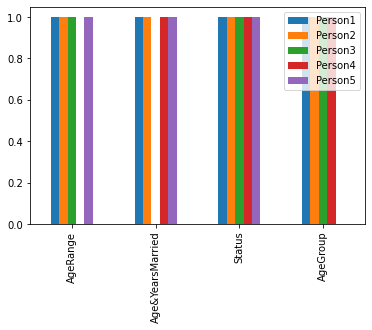

In [ ]:
# v)

import matplotlib.pyplot as plt
import seaborn as sbs

df2.astype('int').plot(kind='bar')
plt.show()

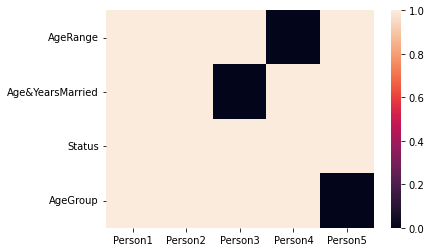

In [ ]:
sbs.heatmap(df2)